Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.<br>
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.<br>
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».<br>

1. [Откройте файл с данными и изучите общую информацию](#zgl)
- [Импорт бибилиотек](#import)
- [Открытие файла и описательная статистика](#open)
2. [Подготовка данных](#pdg)
- [Изменение типа данных](#change)
- [Заполнение пропусков](#na)
3. [Исследовательский анализ данных](#analyz)
- [Распределение количества игр по годам](#rsp)
- [Платформы с наибольшими суммарными продажами и построение распределение по годам](#year)
- [Определение актуального приода, выделение актуальных платформ платформ](#period)
- [Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков](#infl)
- [Распеределение игр по жанрам](#genre)
4. [Портрет пользователя каждого региона](#region)
5. [Проверьте гипотезы](#gip)
- [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#gip1)
- [Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные](gip2)
6. [Общий вывод](#v)

## Откройте файл с данными и изучите общую информацию
<a id="zgl"></a>

### Импорт библиотек
<a id="import"></a>

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import math
import warnings
warnings.filterwarnings('ignore')

### Открытие файла и описательная статистика
<a id="open"></a>

In [2]:
#запишем файл в переменную
df = pd.read_csv('/datasets/games.csv')

In [3]:
#выведем таблицу на экран
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Подробнее про колонки таблицы users:<br>
<br>
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [4]:
f'Таблица включает в себя {df.shape[0]} строк и {df.shape[1]} колонок'

'Таблица включает в себя 16715 строк и 11 колонок'

In [5]:
#посмотрим основные статистические данные
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
#количество пропусков
df.isnull().sum()[df.isnull().sum(axis=0) > 0]

Name                  2
Year_of_Release     269
Genre                 2
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
df.isnull().sum()[df.isnull().sum(axis=0) > 0] / len(df) *100

Name                0.011965
Year_of_Release     1.609333
Genre               0.011965
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

In [8]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

In [9]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

# Вывод
При первом рассмотрении данным выявлены много прпусков. особенно в колонках Critic_Score 51%, 
User_Score 40% и Rating 41% от общего количества данных. Постараемся максимально заполнить эти данные исходя из рейтинга игры на другой платформе. Строки с пропущенными именем и годом релиза будут удалены, % данных пропусков незначителен и составляет 0,02 и 1,6 5 соответственно.<br>
Также стоит изменить типы данных и привести название колонок к нижнему регистру.<br>
Значения в колонке user_score "tbd" будут заменены на пропуски, так как это значение говорит об остутствии достаточного количества оценок


## Подготовка данных
<a id="pdg"></a>

### Изменение типа данных
<a id="change"></a>

In [10]:
#приведем название колонок к нижнему регистру
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [11]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [12]:
#для удобства приведем данные в таблице к нижнему регистру
df['name']= df['name'].str.lower()
df['platform']= df['platform'].str.lower()
df['platform']= df['platform'].str.lower()
df['genre']= df['genre'].str.lower()

In [13]:
#удалим строки с пропущенными данными
df.dropna(subset = ['year_of_release'],axis = 0, how ='all', inplace=True)
df.dropna(subset = ['genre'],axis = 0, how ='all', inplace=True)

In [14]:
df.isnull().sum()[df.isnull().sum(axis=0) > 0]

critic_score    8461
user_score      6605
rating          6676
dtype: int64

In [15]:
#изменим тип данных
df = df.astype({'year_of_release':'int16'})

### Заполнение пропусков
<a id="na"></a>

In [16]:
#посчитаем общую сумму проданных копий
df['general_sales'] = df['na_sales'] + df['eu_sales'] + df['other_sales']

In [17]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,E,78.77
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,33.43
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,31.73
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,E,29.49
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,21.16


In [18]:
#заменим данные в колонке user_score
df.loc[df['user_score'] == 'tbd','user_score'] = df.loc[df['user_score'].isna()]
df = df.astype({'user_score':'float'})

In [19]:
#заполним возможные пропуски в колонках user_score и critic_score
median_score = (df.groupby('name').agg({'critic_score':'median','user_score':'median'}).reset_index()
                    .rename(columns={'critic_score':'critic_median_score','user_score':'user_median_score'}))
df = df.merge(median_score,on='name',how='left')


In [20]:
df.isnull().sum()[df.isnull().sum(axis=0) > 0]

critic_score           8461
user_score             8981
rating                 6676
critic_median_score    7522
user_median_score      7920
dtype: int64

In [21]:
df[['critic_score','user_score']] = df[['critic_median_score','user_median_score']]

In [22]:
df.drop(columns=['critic_median_score','user_median_score'],inplace = True)

In [23]:
df.isnull().sum()[df.isnull().sum(axis=0) > 0]

critic_score    7522
user_score      7920
rating          6676
dtype: int64

In [24]:
df.duplicated().sum()

0

# Вывод
При подготовке данных:
* привели названия колонок и данные в таблице к нижнему регистру
* Удалили строки с пропусками в колонках year of release и genre, около 1.5% от общего количества данных
* Изменили тип данных в колонке year_of_release на int, т.к. в данном столбце находятся целые числа года, и в колонке user_score измениили тип данных на float, из-за значения "tbd" колонка имела тип данных object, хотя там располагаются числа
* создали колонку с суммарным количеством проданных копий в разных странах
* заменили значение "tbd" в колонке user_score на пропуски, так как это значение говорит об отсутствии достаточных данных, для определения рейтинга
* обработали пропуски в колонках user_score, critic_score на рейтинг данных игр на других платформах
* оставшиеся пропуски в колонках user_raiting , critic_raiting и raiting обрабатыватья не будут, для избежания искажения данных

##  Исследовательский анализ данных
<a id="analyz"></a>

### Распределение количества игр по годам
<a id="rsp"></a>

In [25]:
#посмотрим распределение выпущенных игр по годам
df.pivot_table(index='year_of_release', values='name',aggfunc='count')

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


### Платформы с наибольшими суммарными продажами и построение распределение по годам
<a id="year"></a>

In [26]:
#создадим таблицу по суммарным продажам по годам
platform=df.pivot_table(index='platform',values='general_sales',columns='year_of_release',aggfunc='sum')
platform.fillna(0,inplace=True)

In [27]:
platform['full'] = 0 #колонка для суммарных продаж по всем годам
for j in platform.columns.unique():
    if j != 'full':
        platform['full'] += platform[j]
platform = platform.sort_values(by='full',ascending=False)

In [28]:
platform.head(11)

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,full
platform,,,,,,,,,,,,,,,,,,,,,
ps2,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,...,48.17,24.46,4.93,0.36,0.00,0.00,0.00,0.00,0.00,1096.02
x360,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,...,133.37,118.34,167.92,142.06,98.68,88.15,34.66,11.96,1.52,948.94
ps3,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,...,112.70,121.90,132.30,142.68,95.42,101.12,41.51,13.15,2.30,851.93
wii,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,...,158.63,190.40,119.17,54.07,18.37,8.54,3.75,1.14,0.18,822.90
ds,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,...,121.30,95.33,65.16,21.86,7.29,1.54,0.00,0.00,0.00,627.76
ps,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,587.80
ps4,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,25.05,97.03,112.59,63.51,298.18
gba,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,266.32
pc,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.0,0.03,0.0,...,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25,255.59


In [29]:
#выделим лучшие платформы
best_platform = platform.query('full >200')
best_platform.index

Index(['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps', 'ps4', 'gba', 'pc', 'xb',
       'psp'],
      dtype='object', name='platform')

In [30]:
best_platform = best_platform.drop(columns ='full')

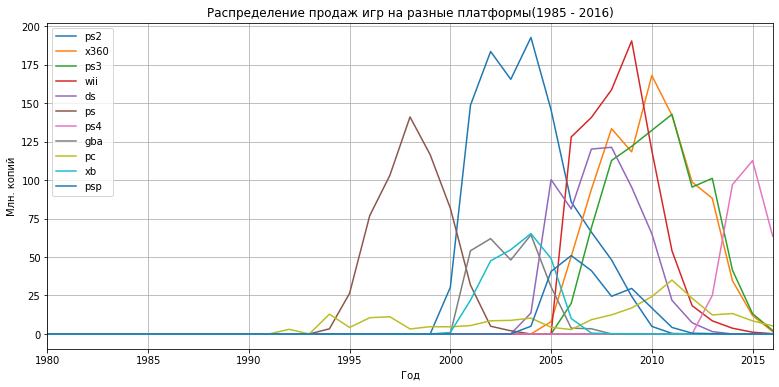

In [31]:
#построим график продаж
best_platform.T.plot(grid=True,figsize=(13,6))
plt.title('Распределение продаж игр на разные платформы(1985 - 2016)')
plt.xlabel('Год')
plt.ylabel('Млн. копий')
plt.legend(loc='upper left')
plt.show()

### Определение актуального приода, выделение актуальных платформ платформ
<a id="period"></a>

In [32]:
#создание таблицы с актуальным периодом
df_filt = df.query('2015 >= year_of_release > 2004').reset_index().drop(columns='index')

Определили актуальный период для исследования будущих продаж от 2005г. - незадолго до пиковых значние по количеству проданных копий до 2015г.,т.к. данные за 2016г. неполные и могут частично исказить данные по продажам.

In [33]:
#сгруппируем таблицу по продаже количества копий по годам по каждой платформе
df_filt_group = df_filt.pivot_table(index='year_of_release',values='general_sales',columns='platform',aggfunc='sum')

In [34]:
df_filt_group

platform,3ds,dc,ds,gba,gc,pc,ps2,ps3,ps4,psp,psv,wii,wiiu,x360,xb,xone
year_of_release,,,,,,,,,,,,,,,,
2005,NaN,NaN,100.28,30.59,25.05,4.37,145.61,NaN,NaN,40.62,NaN,NaN,NaN,7.97,49.06,NaN
2006,NaN,NaN,81.25,3.77,11.05,2.85,85.78,19.88,NaN,50.93,NaN,128.00,NaN,50.42,10.04,NaN
2007,NaN,0.0,120.13,3.40,0.27,9.28,66.17,68.97,NaN,41.15,NaN,140.65,NaN,93.89,0.55,NaN
2008,NaN,0.0,121.30,NaN,NaN,12.42,48.17,112.70,NaN,24.48,NaN,158.63,NaN,133.37,0.18,NaN
2009,NaN,NaN,95.33,NaN,NaN,16.91,24.46,121.90,NaN,29.59,NaN,190.40,NaN,118.34,NaN,NaN
2010,NaN,NaN,65.16,NaN,NaN,24.28,4.93,132.30,NaN,16.88,NaN,119.17,NaN,167.92,NaN,NaN
2011,50.37,NaN,21.86,NaN,NaN,35.03,0.36,142.68,NaN,4.25,3.83,54.07,NaN,142.06,NaN,NaN
2012,31.38,NaN,7.29,NaN,NaN,23.22,NaN,95.42,NaN,0.51,13.74,18.37,15.43,98.68,NaN,NaN
2013,33.00,NaN,1.54,NaN,NaN,12.38,NaN,101.12,25.05,0.21,6.54,8.54,18.08,88.15,NaN,18.94


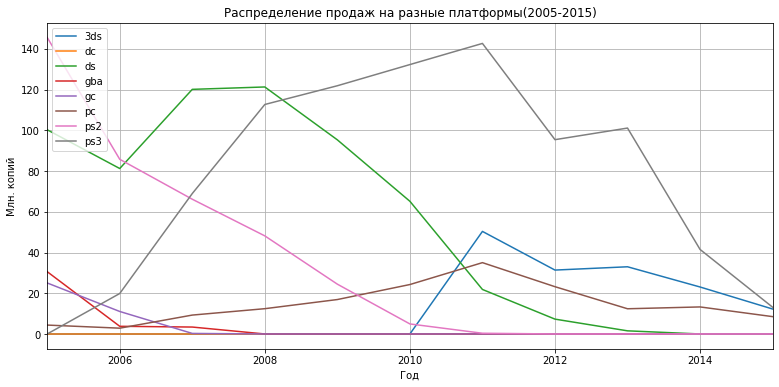

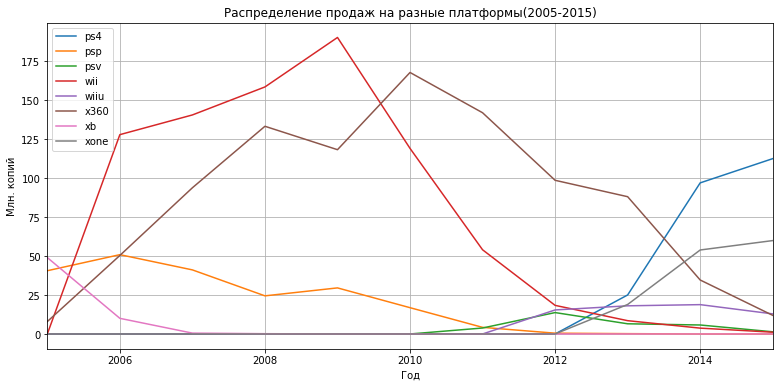

In [35]:
#разделим платформы поровну на разные графики для удобства отображения информации
from math import ceil
def parting(xs, parts):
    part_len = ceil(len(xs)/parts)
    return [xs[part_len*k:part_len*(k+1)] for k in range(parts)]
platform1 , platform2 = parting(df_filt_group.columns.unique(),2)

df_filt_group[platform1].fillna(0).plot(figsize=(13,6),grid=True)
plt.title('Распределение продаж на разные платформы(2005-2015)')
plt.xlabel('Год')
plt.ylabel('Млн. копий')
plt.legend(loc='upper left')
df_filt_group[platform2].fillna(0).plot(figsize=(13,6),grid=True)
plt.title('Распределение продаж на разные платформы(2005-2015)')
plt.xlabel('Год')
plt.ylabel('Млн. копий')
plt.legend(loc='upper left')
plt.show()


Наиболее актуальные платформы: 3ds, pc,ps3,ps4,wiiu,x360,xone. Рост заметен только у ps4 и xone.По другим платформам заметно явно падение продаж. Также в стабильные потенциально актуальные платформы можно включить pc и wiiu.

In [36]:
actualy_platform = ['3ds','pc','ps3','ps4','wiiu','x360','xone']


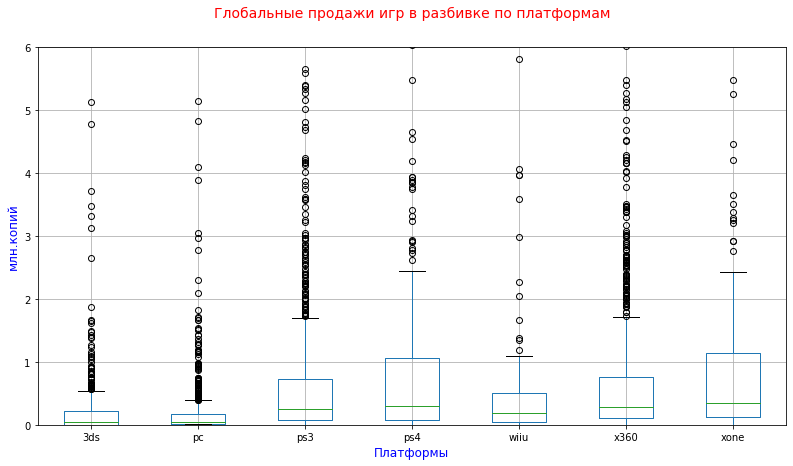

In [37]:
df_filt.query('platform in @actualy_platform').boxplot('general_sales', by='platform',figsize=(13,7))
plt.ylim(0,6)
plt.title(None)
plt.suptitle('Глобальные продажи игр в разбивке по платформам',color='red',size=14)
plt.ylabel('млн.копий', color='blue',size=12)
plt.xlabel('Платформы', color='blue',size=12)
plt.show()

### Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков. 
<a id="infl"></a>

Наиболее попульярной из актуальных является платформа x360

In [38]:
x360 = df_filt.query('platform == "x360"')
x360[['user_score','critic_score']].fillna(0,inplace=True)

In [39]:
x360 = x360.query('user_score !=0 and critic_score!=0')

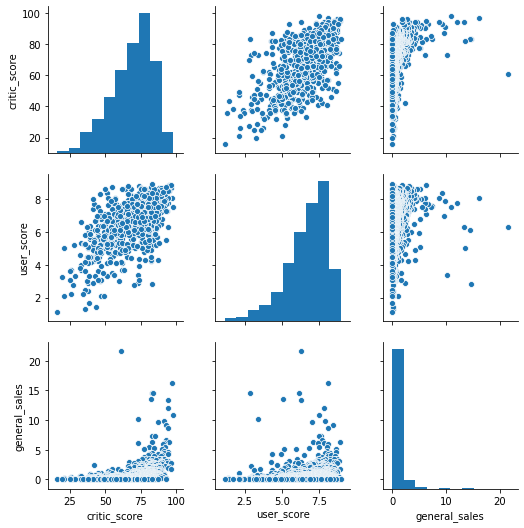

In [40]:
sns.pairplot(x360[['critic_score','user_score','general_sales']])

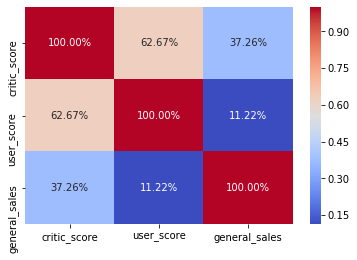

In [41]:
sns.heatmap(x360[['critic_score','user_score','general_sales']].corr(),cmap='coolwarm',annot=True , fmt='.2%')

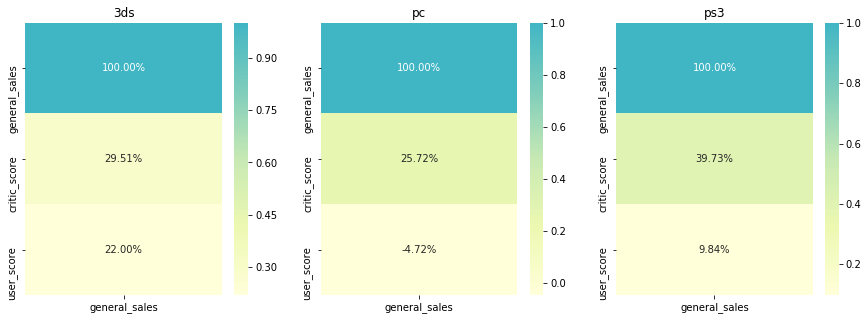

In [42]:
platforms1 = ['3ds','pc','ps3']
num_cols = len(platform1)
num_rows = 1
plt.figure(figsize = (15, 5)) 
for i, platform in enumerate(platforms1):
    df_corr = df_filt.query('platform == @platform')
    df_corr = df_corr[['user_score', 'critic_score', 'general_sales']]
    (sns.heatmap(df_corr.corr()[['general_sales']].sort_values('general_sales', ascending=False), center=1, annot=True, cmap="YlGnBu", 
                 ax = plt.subplot(num_rows, 3, i + 1),fmt='.2%'))
    plt.title(platform)

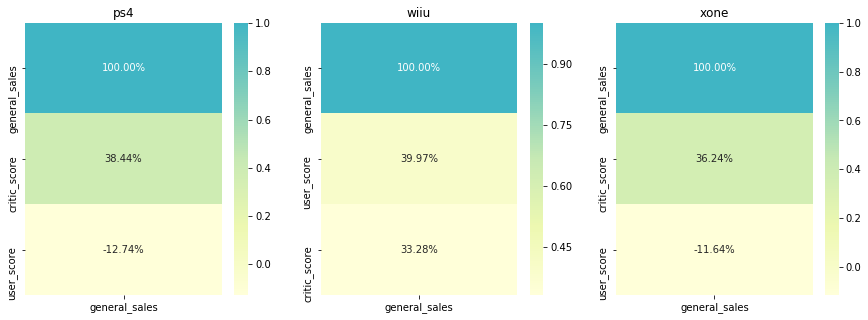

In [43]:
platforms2 = ['ps4','wiiu','xone']
num_cols = len(platform2)
num_rows = 1
plt.figure(figsize = (15, 5)) 
for i, platform in enumerate(platforms2):
    df_corr = df_filt.query('platform == @platform')
    df_corr = df_corr[['user_score', 'critic_score', 'general_sales']]
    (sns.heatmap(df_corr.corr()[['general_sales']].sort_values('general_sales', ascending=False), center=1, annot=True, cmap="YlGnBu", 
                 ax = plt.subplot(1, 3, i +1),fmt='.2%'))
    plt.title(platform)

### Распеределение игр по жанрам
<a id="genre"></a>

In [44]:
genre_group = (df.pivot_table(index = 'genre' , values = 'general_sales', aggfunc ='sum')
 .sort_values(by='general_sales',ascending=False))

In [45]:
genre_group

,general_sales
genre,
action,1556.38
sports,1174.74
shooter,1002.68
platform,694.84
misc,683.27
racing,666.86
role-playing,577.69
fighting,355.38
simulation,324.32


Text(0, 0.5, 'млн.копий')

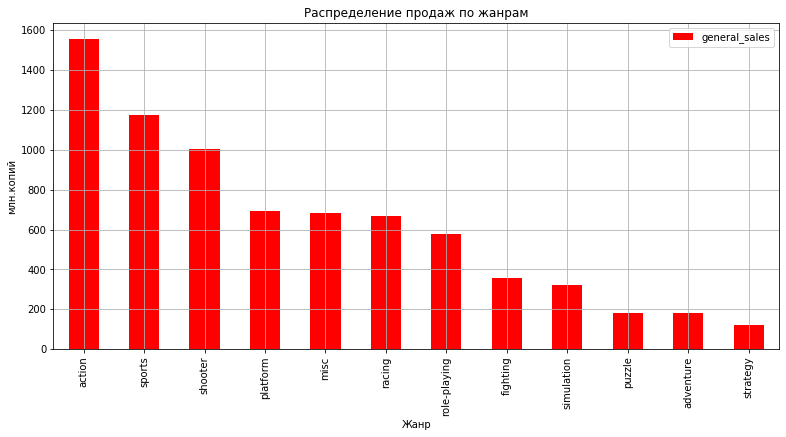

In [46]:
genre_group.plot(kind='bar',color = 'red', grid=True,figsize =(13,6))
plt.title('Распределение продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('млн.копий')

In [47]:
df_filt.pivot_table(index='rating',values='name',aggfunc='count')

,name
rating,
AO,1
E,2607
E10+,1329
EC,8
M,1157
RP,1
T,1927


# Вывод
Проведя исследования по количеству выпущенных игр в разные года, мы можем увидеть постепенный рост , достигший пика в 2008 году и дальше наблюдается спад.Рост можно объяснить развитием игровой индустрии, появлением большего количество платформ и большего количества геймеров. Спад после 2008 года можно объяснить увеличения качества выпускаемых игр, для которого необходимо задействования большего количества людских и финансовых ресурсов. <br>
При рассмотрении распределения количества продаж по играм на разные платформы мы можем увидеть, что крупные платформы(с продажами более 500 млн. копий) имеют акуальность в районе 10 лет, после 5 лет они постепенно начинают терять актуальность и продажи идут на спад. Платформы пользующиеся сравнительно небольшой популярностью(от 200 до 500 млн.копий), имеют срок актуальности в районе 5-7 лет. На это влияет выпуск новых версий консолей.<br>
Определили актуальный период для исследования будущих продаж от 2005г. - незадолго до пиковых значние по количеству проданных копий до 2015г.,т.к. данные за 2016г. неполные и могут частично исказить данные по продажам.<br>
Наиболее актуальные платформы в рассматриваемом периоде: 3ds, pc,ps3,ps4,wiiu,x360,xone. Рост заметен только у ps4 и xone.По другим платформам заметно явно падение продаж. Также в стабильные потенциально актуальные платформы можно включить pc и wiiu.<br>
Рассматривая показатели по продажам самой актуальной платформы на 2015г. -  "x360" обнаружили низкую линейную зависимость продаж в зависимости от оценки критиков и очень низкую зависимость продаж в зависимости от оценки пользователей, что также соотносится и при рассмотрении зависимости продаж игр для других платформ. Зависимость продаж от оценки пользователей выше всех наблюдается у пользователей консолей фирмы Nintendo.<br>
В распределении количества проданных копий по жанр явный лидер игры жанра action. Это объясняется выпуском качественных игры в этом жанре, например серия игр GTA, Diablo.

## Портрет пользователя каждого региона
<a id="region"></a>

In [48]:
#переведем рейтинг в русский формат
df['rating'].fillna('na',inplace=True)
def rank(rating):
    if 'E' in rating:
        return 'старше 6 лет'
    if 'M'in rating:
        return 'старше 17 лет'
    if 'T' in rating:
        return 'старше 16 лет'
    if 'E10+' in rating:
        return 'старше 10 лет'
    if 'AO' in rating:
        return 'старше 18 лет'
    if 'EC' in rating:
        return 'старше 3 лет'
    if 'RP' in rating:
        return 'старше 21 года'
    return 'не определен'
df['classificat'] = df['rating'].apply(rank)

In [49]:
df['classificat'].unique()

array(['старше 6 лет', 'не определен', 'старше 17 лет', 'старше 16 лет',
       'старше 18 лет', 'старше 21 года'], dtype=object)

,na_sales,ratio
platform,,
x360,595.05,23.029231
wii,486.81,18.840198
ps3,389.46,15.072623
ds,371.98,14.396124
ps2,200.49,7.759231


,eu_sales,ratio
platform,,
ps3,325.95,20.815638
x360,267.61,17.089962
wii,258.21,16.489664
ds,184.48,11.781160
ps4,109.31,6.980695


,jp_sales,ratio
platform,,
ds,171.35,28.736982
3ds,92.59,15.528200
ps3,78.11,13.099770
psp,73.85,12.385329
wii,68.28,11.451188


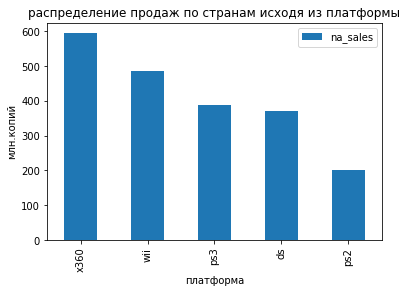

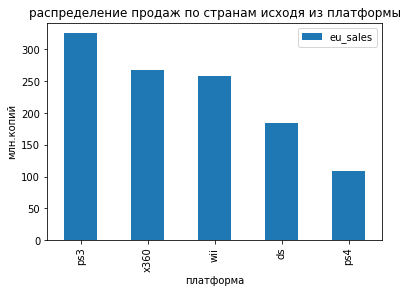

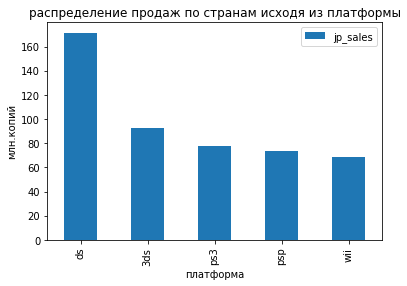

In [50]:
#Рассмотрим распределение по странам
countries = ['na_sales','eu_sales','jp_sales']
for country in countries:
    top5 = df_filt.pivot_table(index='platform', values=country, aggfunc = np.sum ).sort_values(by=country,ascending=False).head(5)
    top5.plot(kind='bar')
    plt.title('распределение продаж по странам исходя из платформы')
    plt.xlabel('платформа')
    plt.ylabel('млн.копий')
    plt.show
    top5['ratio'] = top5[country] / df_filt[country].sum()*100
    display(top5)
    

,na_sales,ratio
genre,,
action,863.17,33.405834
sports,671.20,25.976338
shooter,584.83,22.633703
platform,444.44,17.200423
misc,399.57,15.463894


,eu_sales,ratio
genre,,
action,510.99,32.632560
sports,371.33,23.713671
shooter,314.52,20.085702
racing,234.49,14.974871
misc,210.60,13.449221


,jp_sales,ratio
genre,,
role-playing,353.39,59.266775
action,160.14,26.856961
sports,134.93,22.629010
platform,130.71,21.921277
misc,107.02,17.948245


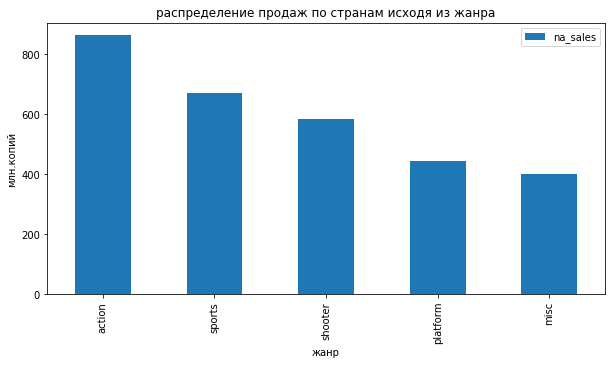

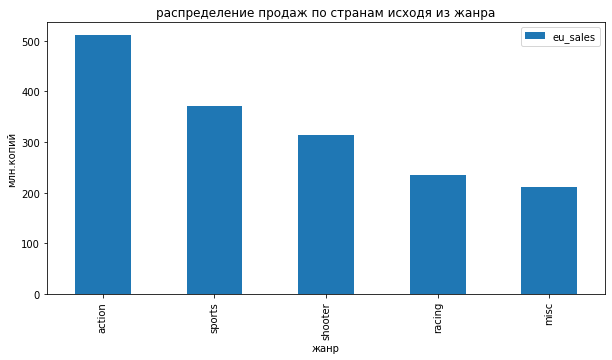

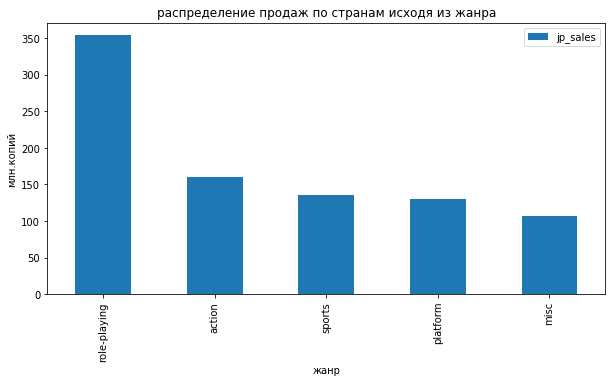

In [51]:
countries = ['na_sales','eu_sales','jp_sales']
for country in countries:
    top5 = df.pivot_table(index='genre', values=country, aggfunc = np.sum ).sort_values(by=country,ascending=False).head(5)
    top5.plot(kind='bar',figsize=(10,5))
    plt.title('распределение продаж по странам исходя из жанра')
    plt.xlabel('жанр')
    plt.ylabel('млн.копий')
    plt.show
    top5['ratio'] = top5[country] / df_filt[country].sum()*100
    display(top5)

,na_sales,ratio
classificat,,
старше 6 лет,1621.27,62.745318
старше 16 лет,747.60,28.933120
старше 17 лет,742.89,28.750837
старше 18 лет,1.26,0.048764
старше 21 года,0.00,0.000000


,eu_sales,ratio
classificat,,
старше 6 лет,887.33,56.666177
старше 17 лет,480.00,30.653494
старше 16 лет,421.79,26.936119
старше 18 лет,0.61,0.038955
старше 21 года,0.03,0.001916


,jp_sales,ratio
classificat,,
старше 6 лет,238.16,39.941637
старше 16 лет,150.70,25.273785
старше 17 лет,63.58,10.662955
старше 18 лет,0.00,0.000000
старше 21 года,0.00,0.000000


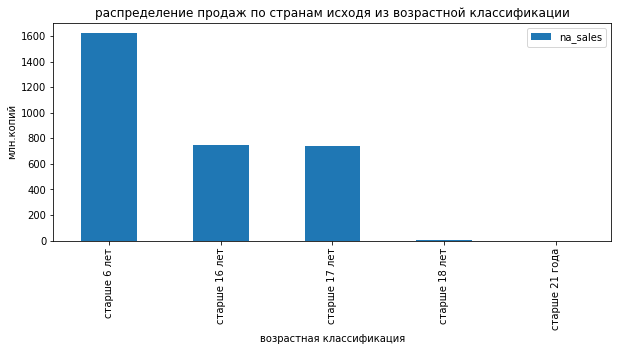

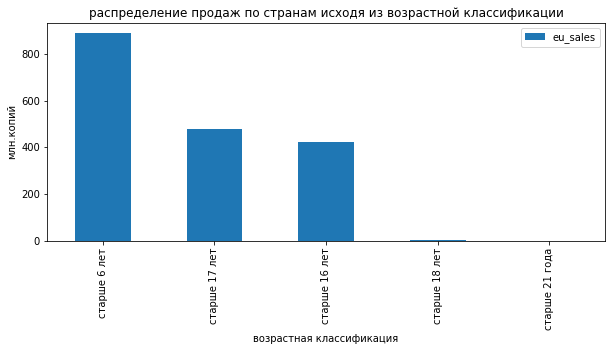

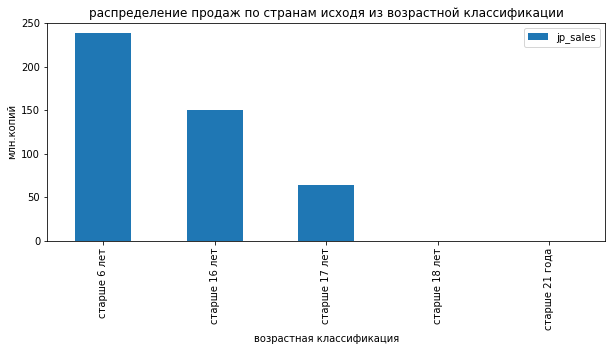

In [52]:
countries = ['na_sales','eu_sales','jp_sales']
for country in countries:
    top5 = df.query('classificat != "не определен"').pivot_table(index='classificat', values=country, aggfunc = np.sum ).sort_values(by=country,ascending=False).head(5)
    top5.plot(kind='bar',figsize=(10,4))
    plt.title('распределение продаж по странам исходя из возрастной классификации')
    plt.xlabel('возрастная классификация')
    plt.ylabel('млн.копий')
    plt.show
    top5['ratio'] = top5[country] / df_filt[country].sum()*100
    display(top5)

In [53]:
df[df['classificat'] == '']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales,classificat


# Вывод
Рассмотрев распеределение по продажам в разных странах исходя из разных факторов мы увидели:
* наиболее популярные игровые платформы в северной америке и европе во многом совпадают, но в европе быстрее начала набирать популярность ps4 , выпущенная в 2013 году. Рынок в Японии можно считать более особенным, там наибольшую популярность имеют игры на консоли Nintendo, общая популярность с западным рынком, это популярность игр на консоль ps3.
* по популярности жанров разницы в популярности между северной америкой и европой может увидеть только в популярности ролевых игр в Америке и гонок в Европе, Япония опять выглядит более особенным рынком, самый популярный жанр ролевые игры , но везде шутеры и экшен в списке одних из самых популярных жанров.
* по возрастному рейтингу особых различий в продажах нет, лидируют продажи игр для широкой категории граждан "выше 6 лет" ,  очень мало игр с рейтингом выше 18 лет , это связано с присвоением классификации, в основном в данной классификации редко присваивается рейтинг RP и AO, это редкие исключение. если взять например игру  GTA5, в которой можно сказать очень много жестокости и различной пропаганды, она имеет рейтинг M(для лиц старше 17 лет).

## Проверьте гипотезы
<a id="gip"></a>

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
<a id="gip1"></a>

Гипотезы:
* H0: средний пользовательский рейтинг платформ Xbox One и PC одинаковый
* H1: средний пользовательский рейтинг платформ Xbox One и PC различается

In [54]:
alpha = 0.05

In [55]:
xbox = df_filt
xbox['user_score'].fillna(0,inplace=True)
xbox = xbox.query('platform == "xone" and user_score !=0')
xbox['user_score'].var()

1.983591309453905

In [56]:
pc = df_filt
pc['user_score'].fillna(0,inplace=True)
pc = pc.query('platform == "pc" and user_score !=0')
pc['user_score'].var()

1.7657529001268804

In [57]:
results = st.ttest_ind(xbox['user_score'],pc['user_score'],equal_var=False)
print('p - значение' , results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p - значение 9.16488542337547e-06
Отвергаем нулевую гипотезу


Cредний пользовательский рейтинг платформ Xbox One и PC различается

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
<a id="gip2"></a>

Гипотезы:

* H0: средний пользовательский рейтинг жанров Action и Sports одинаковый
* H1: средний пользовательский рейтинг жанров Action и Sports различается

In [58]:
action = df_filt
action['user_score'].fillna(0,inplace=True)
action = action.query('genre == "action" and user_score !=0')
action['user_score'].var()

1.4067358911149084

In [59]:
sports = df_filt
sports['user_score'].fillna(0,inplace=True)
sports = sports.query('genre == "sports" and user_score !=0')
sports['user_score'].var()

2.0502902253086175

In [60]:
results = st.ttest_ind(sports['user_score'],action['user_score'],equal_var=False)
print('p-значение', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    

p-значение 8.337504797212763e-12
Отвергаем нулевую гипотезу


Cредний пользовательский рейтинг жанров Action и Sports различается

## Общий вывод
<a id="v"></a>

Проведя исследования по количеству выпущенных игр в разные года, мы можем увидеть постепенный рост , достигший пика в 2008 году и дальше наблюдается спад.Рост можно объяснить развитием игровой индустрии, появлением большего количество платформ и большего количества геймеров. Спад после 2008 года можно объяснить увеличения качества выпускаемых игр, для которого необходимо задействования большего количества людских и финансовых ресурсов.
При рассмотрении распределения количества продаж по играм на разные платформы мы можем увидеть, что крупные платформы(с продажами более 500 млн. копий) имеют акуальность в районе 10 лет, после 5 лет они постепенно начинают терять актуальность и продажи идут на спад. Платформы пользующиеся сравнительно небольшой популярностью(от 200 до 500 млн.копий), имеют срок актуальности в районе 5-7 лет. На это влияет выпуск новых версий консолей.
Определили актуальный период для исследования будущих продаж от 2005г. - незадолго до пиковых значние по количеству проданных копий до 2015г.,т.к. данные за 2016г. неполные и могут частично исказить данные по продажам.
Наиболее актуальные платформы в рассматриваемом периоде: 3ds, pc,ps3,ps4,wiiu,x360,xone. Рост заметен только у ps4 и xone.По другим платформам заметно явно падение продаж. Также в стабильные потенциально актуальные платформы можно включить pc и wiiu.
Рассматривая показатели по продажам самой актуальной платформы на 2015г. - "x360" обнаружили низкую линейную зависимость продаж в зависимости от оценки критиков и очень низкую зависимость продаж в зависимости от оценки пользователей, что также соотносится и при рассмотрении зависимости продаж игр для других платформ. Зависимость продаж от оценки пользователей выше всех наблюдается у пользователей консолей фирмы Nintendo.
В распределении количества проданных копий по жанр явный лидер игры жанра action. Это объясняется выпуском качественных игры в этом жанре, например серия игр GTA, Diablo.<br>
<br>
Рассмотрев распеределение по продажам в разных странах исходя из разных факторов мы увидели:

* наиболее популярные игровые платформы в северной америке и европе во многом совпадают, но в европе быстрее начала набирать популярность ps4 , выпущенная в 2013 году. Рынок в Японии можно считать более особенным, там наибольшую популярность имеют игры на консоли Nintendo, общая популярность с западным рынком, это популярность игр на консоль ps3.
* по популярности жанров разницы в популярности между северной америкой и европой может увидеть только в популярности ролевых игр в Америке и гонок в Европе, на 1 месте на этих континентах жанр action - 22 и 23% от общих продаж в этих странах , Япония опять выглядит более особенным рынком, самый популярный жанр ролевые игры(29%), жанр ation 16% , но везде шутеры и экшен в списке одних из самых популярных жанров.
* по возрастному рейтингу особых различий в продажах нет, лидируют продажи игр для широкой категории граждан "выше 6 лет"(в северной Америке это 47% от общих продаж в этой стране, в Европе 42 , в Японии 31%) , очень мало игр с рейтингом выше 18 лет , это связано с присвоением классификации, в основном в данной классификации редко присваивается рейтинг RP и AO, это редкие исключение. если взять например игру GTA5, в которой можно сказать очень много жестокости и различной пропаганды, она имеет рейтинг M(для лиц старше 17 лет).
<br>
Рекомендации по планированию  рекламной компании в 2017 году:
* рекламная компания должна строиться исходя и континента, т.к. Японский рынок имеет ряд особенностей описанных выше
* делать акцент на игры для наиболее актуальных платформ, исходя из проведенного анализа, мы можем увидеть, что популярность набирает ps4 и xone, они были выпущены сравнительно недавно и будут актуальны ближайшие года, также обратить внимание на игры для pc, хоть и доля продаж не очень большая, но стабильная.
* Обратить внимание на особенность распределения популярности игровых платформ в Японии. Там пользуются популярностью платформы компании Nintendo.
* Также рекламная компания должна быть направлена на более широкую возрастную категорию, т.к. наибольшая популярность у игр с возрастным рейтингом для лиц старше 6 лет.
* При выборе игр для рекламной компании обращать внимание на рейтинг критиков, т.к. он в большей степени влияет на количество проданных копий.